In [82]:
#Import libraries
import pandas as pd
import numpy as np
import kagglehub
import os

In [83]:
#Dataset path
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print(os.listdir(path))
print(os.path.join(path))

['spam.csv']
/kaggle/input/sms-spam-collection-dataset


In [84]:
#Load dataset
df = pd.read_csv(os.path.join(path, "spam.csv"),encoding='latin-1')

In [85]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [86]:
df.shape

(5572, 5)

**1. Data Cleaning**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [88]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) #drop columns with very less observations

In [89]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True) #rename columns

In [90]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
df.isnull().sum() #missing values

,0
target,0
text,0


In [92]:
df.duplicated().sum() #duplicate values

np.int64(403)

In [93]:
df.drop_duplicates(keep = 'first', inplace=True) #drop duplicates

In [94]:
#Change categorical variable 'target' to numerical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [95]:
df['target']=encoder.fit_transform(df['target'])

In [96]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**2. EDA**

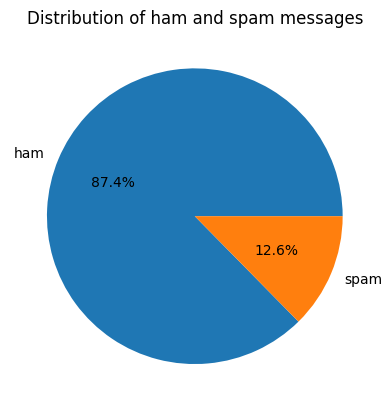

In [97]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels= ['ham','spam'], autopct='%1.1f%%')
plt.title('Distribution of ham and spam messages')
plt.show()

In [98]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [99]:
df['num_characters'] = df['text'].apply(len) #number or characters

In [100]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [101]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #number of words

In [102]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [103]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #number of sentences

In [104]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [105]:
df.iloc[:,1:].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [106]:
#ham
df[df['target']==0].iloc[:, 1:].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [107]:
#spam
df[df['target']==1].iloc[:, 1:].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [108]:
import seaborn as sns

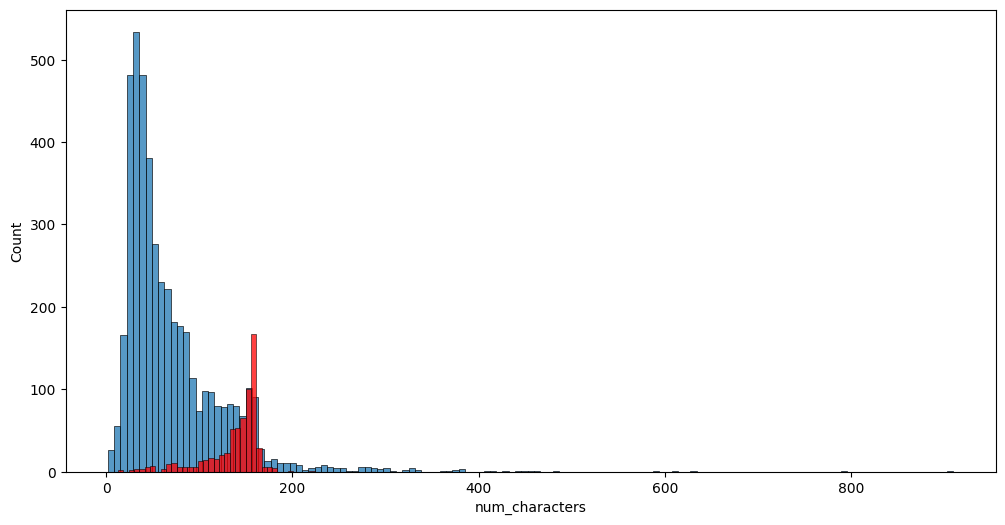

In [109]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color = 'red')
plt.show()

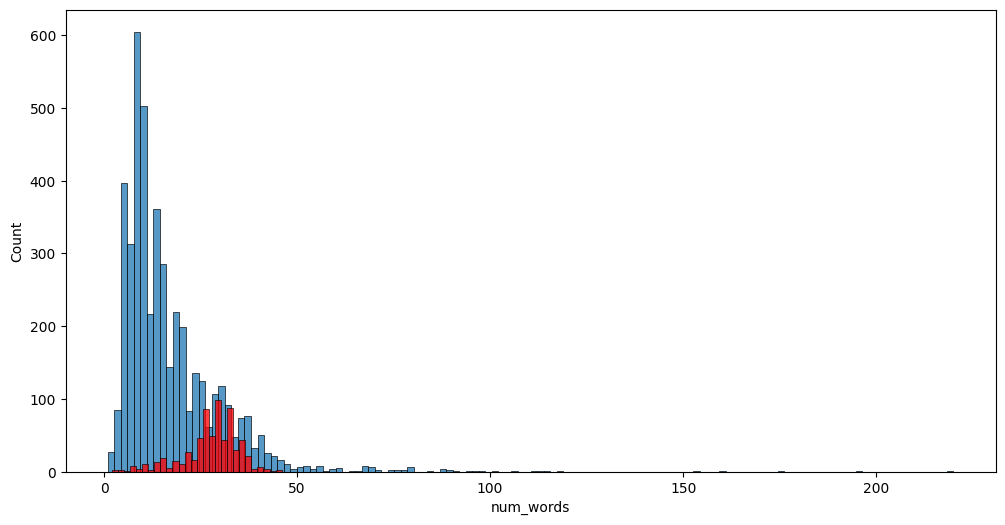

In [110]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color = 'red')
plt.show()

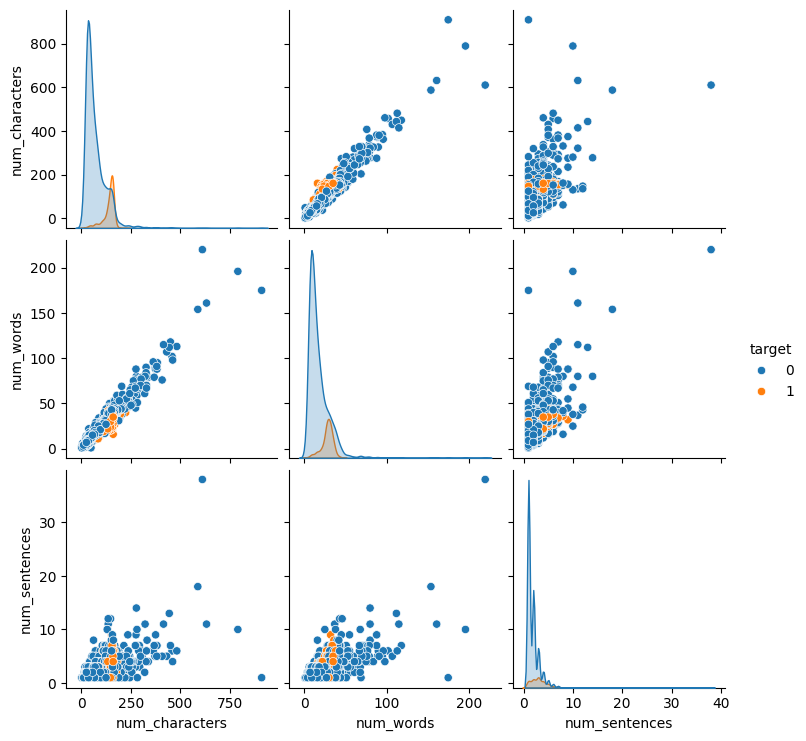

In [111]:
sns.pairplot(df, hue ='target')
plt.show()

In [112]:
df[['num_characters','num_words','num_sentences','target']].corr()['target']

,target
num_characters,0.384717
num_words,0.262912
num_sentences,0.263939
target,1.000000


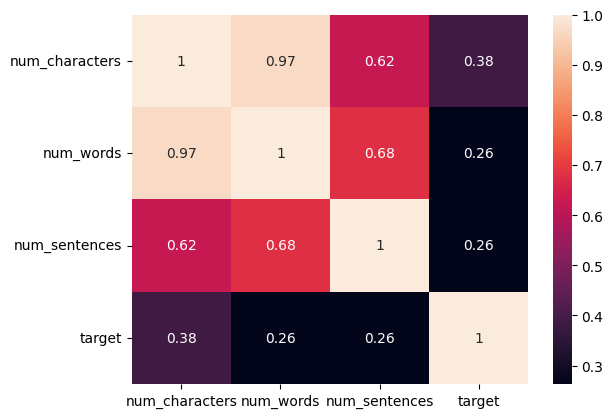

In [113]:
sns.heatmap(df[['num_characters','num_words','num_sentences','target']].corr(), annot=True)
plt.show()

**3. Data(Text) Preprocessing**
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [114]:
#import stopwords, punctuation, and stemming libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#create function to perform text preprocessing steps
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
      if i.isalnum():
          y.append(i)

  text = y[:]
  y.clear()

  for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)

  text = y[:]
  y.clear()

  for i in text:
      y.append(ps.stem(i))

  return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [116]:
df['transformed_text'] = df['text'].apply(transform_text) #apply text transformation

In [117]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [118]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')

In [119]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

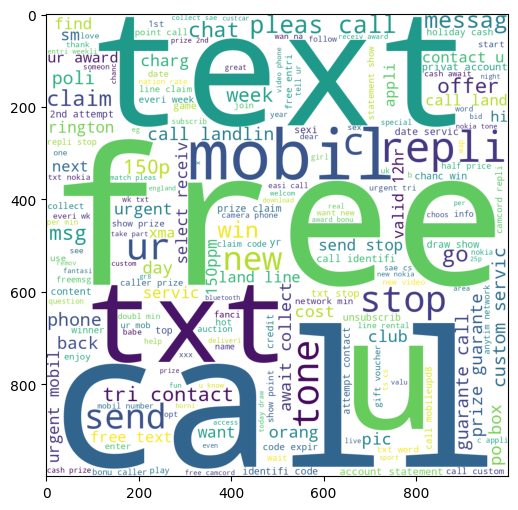

In [120]:
#spam wordcloud
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

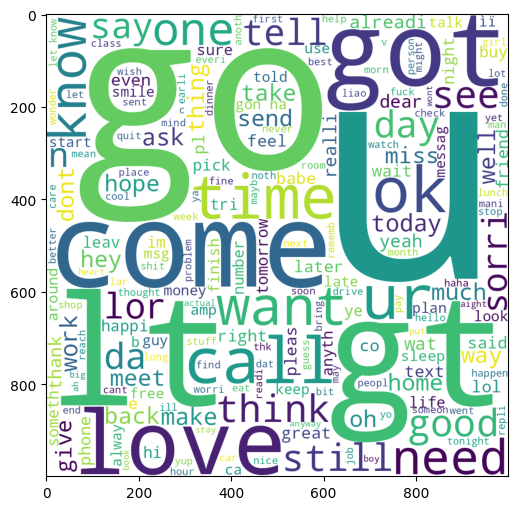

In [121]:
#ham wordcloud
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
#spam wordcloud
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [122]:
#Function to split each words into list of spam messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [123]:
len(spam_corpus)

9939

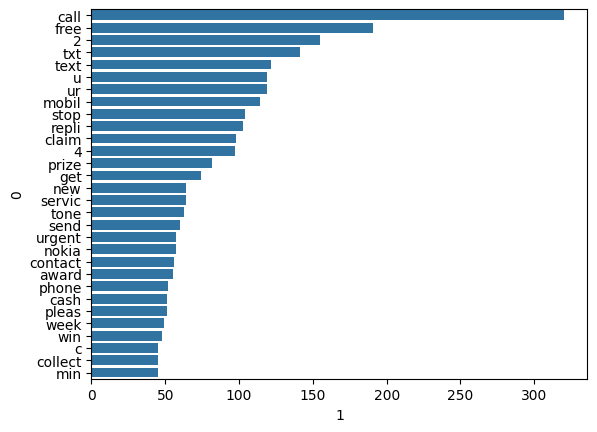

In [124]:
from collections import Counter
top_30_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=top_30_spam[1],y=top_30_spam[0])
# plt.xticks(rotation='vertical')
plt.show()

In [125]:
#Function to split each words into list of ham messages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [126]:
len(ham_corpus)

35404

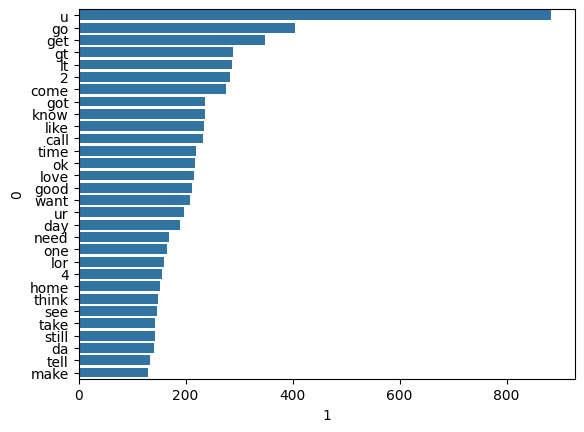

In [127]:
from collections import Counter
top_30_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=top_30_ham[1],y=top_30_ham[0])
# plt.xticks(rotation='vertical')
plt.show()

**4. Model Building**

In [128]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

**(i) Vectorization through BoW**

In [138]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [139]:
x.shape

(5169, 6708)

In [140]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [143]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [144]:
gnb_bow = GaussianNB()
mnb_bow = MultinomialNB()
bnb_bow = BernoulliNB()

In [145]:
gnb_bow.fit(x_train,y_train)
y_pred1 = gnb_bow.predict(x_test)
print(f"Accuracy Score:{accuracy_score(y_test,y_pred1)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred1)}")
print(f"Precision Score:{precision_score(y_test,y_pred1)}")

Accuracy Score:0.8800773694390716
Confusion Matrix:
[[792 104]
 [ 20 118]]
Precision Score:0.5315315315315315


In [146]:
mnb_bow.fit(x_train,y_train)
y_pred2 = mnb_bow.predict(x_test)
print(f"Accuracy Score:{accuracy_score(y_test,y_pred2)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred2)}")
print(f"Precision Score:{precision_score(y_test,y_pred2)}")

Accuracy Score:0.9642166344294004
Confusion Matrix:
[[871  25]
 [ 12 126]]
Precision Score:0.8344370860927153


In [147]:
bnb_bow.fit(x_train,y_train)
y_pred3 = bnb_bow.predict(x_test)
print(f"Accuracy Score:{accuracy_score(y_test,y_pred3)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred3)}")
print(f"Precision Score:{precision_score(y_test,y_pred3)}")

Accuracy Score:0.9700193423597679
Confusion Matrix:
[[893   3]
 [ 28 110]]
Precision Score:0.9734513274336283


**(ii) Vectorization through Tfidf**

In [148]:
x_1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [149]:
y_1 = df['target'].values

In [ ]:
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(x_1,y_1,test_size=0.2,random_state=2)

In [150]:
gnb_tfidf = GaussianNB()
mnb_tfidf = MultinomialNB()
bnb_tfidf = BernoulliNB()

In [151]:
gnb_tfidf.fit(x_train_1,y_train_1)
y_pred4 = gnb_tfidf.predict(x_test_1)
print(f"Accuracy Score:{accuracy_score(y_test_1,y_pred4)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_1,y_pred4)}")
print(f"Precision Score:{precision_score(y_test_1,y_pred4)}")

Accuracy Score:0.874274661508704
Confusion Matrix:
[[790 106]
 [ 24 114]]
Precision Score:0.5181818181818182


In [152]:
mnb_tfidf.fit(x_train_1,y_train_1)
y_pred5 = mnb_tfidf.predict(x_test_1)
print(f"Accuracy Score:{accuracy_score(y_test_1,y_pred5)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_1,y_pred5)}")
print(f"Precision Score:{precision_score(y_test_1,y_pred5)}")

Accuracy Score:0.9709864603481625
Confusion Matrix:
[[896   0]
 [ 30 108]]
Precision Score:1.0


In [153]:
bnb_tfidf.fit(x_train_1,y_train_1)
y_pred6 = bnb_tfidf.predict(x_test_1)
print(f"Accuracy Score:{accuracy_score(y_test_1,y_pred6)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_1,y_pred6)}")
print(f"Precision Score:{precision_score(y_test_1,y_pred6)}")

Accuracy Score:0.9835589941972921
Confusion Matrix:
[[895   1]
 [ 16 122]]
Precision Score:0.991869918699187


*We got best precision with mnb_tfidf_tfidf_tfidf using Tfidf*

In [156]:
#Create model pickle file
pickle.dump(mnb_tfidf, open('model_tfidf.pkl', 'wb'))

In [157]:
#trying with different models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [158]:
#Create objects of different models
lrc = LogisticRegression(solver = 'liblinear', penalty ='l1')
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb_tfidf = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [159]:
clfs ={
    'LR': lrc,
    'SVC': svc,
    'KN': knc,
    'NB': mnb_tfidf,
    'DT': dtc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [160]:
def train_classifier(clf,x_train_1,y_train_1,x_test_1,y_test_1):
    clf.fit(x_train_1,y_train_1)
    y_pred_7 = clf.predict(x_test_1)
    accuracy = accuracy_score(y_test_1,y_pred_7)
    precision = precision_score(y_test_1,y_pred_7)

    return accuracy, precision

In [161]:
train_classifier(mnb_tfidf,x_train_1,y_train_1,x_test_1,y_test_1) #check function

(0.9709864603481625, 1.0)

In [162]:
#Create function to run all models and store results
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,x_train_1,y_train_1,x_test_1,y_test_1)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    print(f"For {name}: Accuracy: {current_accuracy}, Precision: {current_precision}")

For LR: Accuracy: 0.9555125725338491, Precision: 0.96
For SVC: Accuracy: 0.9758220502901354, Precision: 0.9747899159663865
For KN: Accuracy: 0.9052224371373307, Precision: 1.0
For NB: Accuracy: 0.9709864603481625, Precision: 1.0
For DT: Accuracy: 0.9303675048355899, Precision: 0.83
For RF: Accuracy: 0.9738878143133463, Precision: 0.9826086956521739
For AdaBoost: Accuracy: 0.9216634429400387, Precision: 0.8202247191011236
For BgC: Accuracy: 0.9584139264990329, Precision: 0.8682170542635659
For ETC: Accuracy: 0.9748549323017408, Precision: 0.9745762711864406
For GBDT: Accuracy: 0.9506769825918762, Precision: 0.9306930693069307
For xgb: Accuracy: 0.9680851063829787, Precision: 0.9487179487179487


In [ ]:
#create data frame of results
performance_df = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithms,Accuracy,Precision
2,KN,0.905222,1.000000
3,NB,0.970986,1.000000
5,RF,0.973888,0.982609
1,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
0,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
4,DT,0.932302,0.833333


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithms') #change shape for plotting bar graph
performance_df1 = performance_df1.sort_values(
    by='value',
    ascending=False)
performance_df1

,Algorithms,variable,value
11,KN,Precision,1.000000
12,NB,Precision,1.000000
13,RF,Precision,0.982609
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
14,SVC,Precision,0.974790
15,ETC,Precision,0.974576
2,RF,Accuracy,0.973888
1,NB,Accuracy,0.970986
6,xgb,Accuracy,0.968085


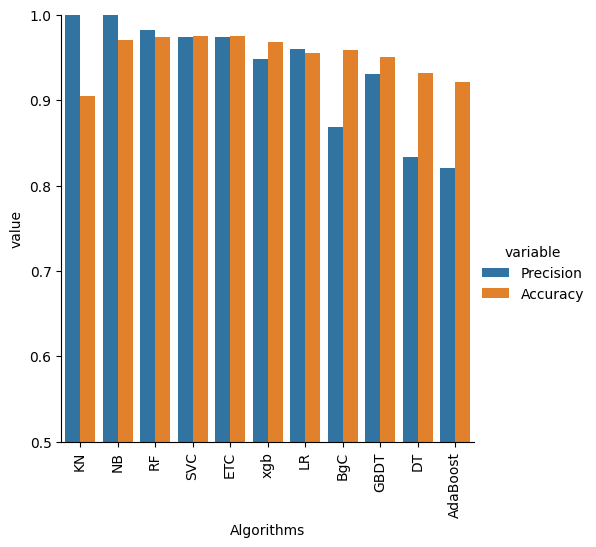

In [ ]:
sns.catplot(x='Algorithms', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.xticks(rotation='vertical')
plt.ylim(0.5,1.0)
plt.show()


**5. Model Improvment**

In [ ]:
#Checking with voting classifier
knc = KNeighborsClassifier()
mnb_tfidf = MultinomialNB()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('KNN', knc), ('NB', mnb_tfidf), ('RF', rfc)], voting='soft')

In [ ]:
voting.fit(x_train_1,y_train_1)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier()),
                             ('NB', MultinomialNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [ ]:
y_pred_8 = voting.predict(x_test_1)
print(f"Accuracy Score:{accuracy_score(y_test_1,y_pred_8)}")
print(f"Precision Score:{precision_score(y_test_1,y_pred_8)}")

Accuracy Score:0.9516441005802708
Precision Score:1.0


In [ ]:
from typing_extensions import final
#Applying stacking
estimators=[('KNN', knc), ('NB', mnb), ('RF', rfc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(x_train_1,y_train_1)
y_pred_10 = clf.predict(x_test_1)
print(f"Accuracy Score:{accuracy_score(y_test_1,y_pred_10)}")
print(f"Precision Score:{precision_score(y_test_1,y_pred_10)}")

Accuracy Score:0.9729206963249516
Precision Score:0.9104477611940298


In [163]:
#Pickle the files
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb_tfidf,open('model_123.pkl','wb'))